In [1]:
import pickle

In [11]:
import pandas as pd

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def read_data(file_name):
    print(file_name)
    data = pickle.load(open(file_name, 'rb'))
    if 'cleaned' in file_name:
        data_df = data
    else:
        data_df = pd.DataFrame(data, index=data['time'])
    data_df['image'] = data_df['btv_data'].apply(lambda x: x['image'])
    data_df['image_x'] = data_df['btv_data'].apply(lambda x: x['x'])
    data_df['image_y'] = data_df['btv_data'].apply(lambda x: x['y'])
    print(len(data_df.keys()))
    return data_df



In [5]:
path = '/home/fvelotti/pCloudDrive/Awake/Data/Scans_Nov_2019_cleaned/'
files = os.listdir(path)

files = list(filter(lambda file_name: file_name.endswith('.p'), files))

In [6]:
for file_name in files[:2]:
    if 'data_scan' in file_name:
        data_df = read_data(path + file_name)

/home/fvelotti/pCloudDrive/Awake/Data/Scans_Nov_2019_cleaned/data_scan_2019-11-21_20_42_12.233616_btv_implict_filtered.p
20
/home/fvelotti/pCloudDrive/Awake/Data/Scans_Nov_2019_cleaned/data_scan_2019-11-21_20_48_50.998801_btv_implict_filtered.p
20


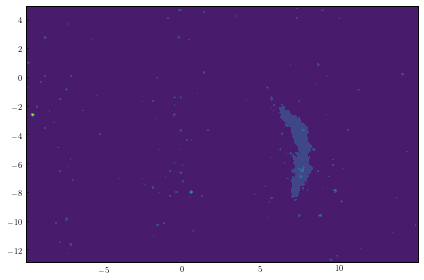

In [10]:
plt.figure()
X, Y = np.meshgrid(data_df['image_x'].iloc[0], data_df['image_y'].iloc[0])
plt.contourf(X, Y, data_df['image'].iloc[0])

In [8]:
data_df.keys()

Index(['time', 'penalty', 'btv_data', 'RPSKN.TSG4.SNH.430000',
       'RPSKN.TSG4.SNJ.430001', 'logical.RQID.430031', 'logical.RQIF.430034',
       'logical.RQID.430037', 'is_episode_over', 'size_r', 'int_r', 'reward',
       'RPSKN.TSG4.SNH.430000_real', 'RPSKN.TSG4.SNJ.430001_real',
       'logical.RQID.430031_real', 'logical.RQIF.430034_real',
       'logical.RQID.430037_real', 'image', 'image_x', 'image_y'],
      dtype='object')

In [9]:
data_df['btv_data'].iloc[0]['y'].shape

(133,)